# Esercitazione 1

Elisa Stabilini - 942529

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Esercizio 1

### Punto 1

Valutare il valor medio con relativa incertezza della distribuzione uniforme tra 0 e 1 in funzione del numero di blocchi utilizzati.

Il valor medio atteso per la distribuzione è $\langle r \rangle = \int_{0}^{1} r dr = \frac{1}{2} $.

Per valutare la media della sequenza di numeri estratti con un generatore pseudo-casuale è stata utilizzata la tecnica di *data blocking*: gli $M = 10^5$ valori estratti sono stati suddivisi in $N=10^2$ blocchi di $\frac{M}{N} = 10^3$ elementi; per ciascun blocco è stata valutata la media $r_i$.

Sono state quindi clacolate la media cumulativa (e relativa incertezza) come segue:

$$ \langle r \rangle_k = \frac{1}{k}\sum_{i=1}^{k} r_i \quad \quad \sigma_{\langle r \rangle_k} = \frac{1}{k}\sum_{i=1}^{k} r_i^2 - \left(\frac{1}{k}\sum_{i=1}^{k} r_i\right)^2 $$

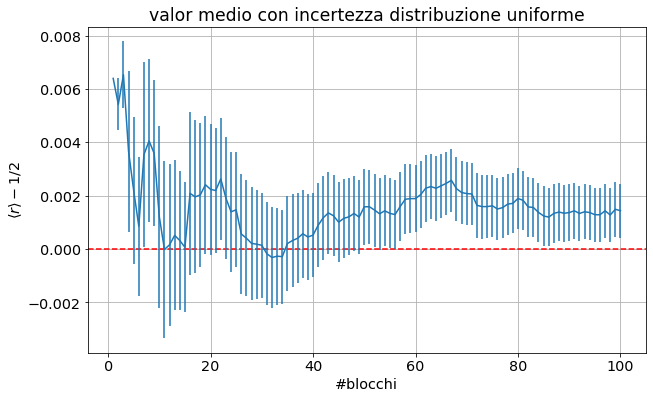

In [3]:
media, sigma_media = np.loadtxt("Out1.dat", usecols=(1,2), delimiter=' ', unpack='true')
valor_vero = 0.5
x = np.arange(len(media))+1
plt.axhline(0.0, color = 'red', linestyle = 'dashed')
plt.errorbar(x,media-valor_vero,yerr=sigma_media)
plt.title('valor medio con incertezza distribuzione uniforme')
plt.xlabel('#blocchi')
plt.ylabel(r'$\langle r \rangle - 1/2$')
plt.grid(True)
plt.show()

### Punto 2

Valutare la varianza con relativa incertezza della distribuzione uniforme tra 0 e 1 in funzione del numero di blocchi utilizzati.

La varianza non è altro che il secondo momento centrale della distribuzione ovvero:
$$ \sigma^2 =\langle(r-\langle r\rangle )^2 \rangle = \int_0^1 \left( r - \frac{1}{2}\right)^2 dr = \frac{1}{12} $$

Per ciascun gruppo di $k$ blocchi è stata quindi calcolata la varianza cumulativa con relativa incertezza come 
$$
    \sigma_k^2 = \frac{1}{k}\sum_{i=1}^{k} (r_i -\langle r \rangle)^2 \quad \quad \sigma_{\sigma_k^2} = \frac{1}{k}\sum_{i=1}^{k} (r_i -\langle r \rangle)^4 -\left( \frac{1}{k}\sum_{i=1}^{k} (r_i -\langle r \rangle)^2 \right)^2
$$

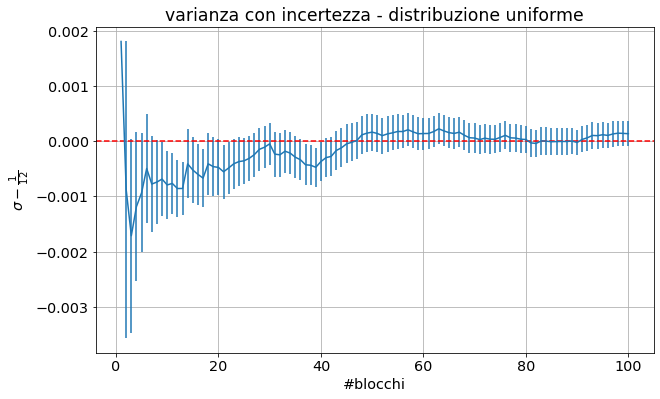

In [4]:
media, sigma_media = np.loadtxt("Out2.dat", usecols=(1,2), delimiter=' ', unpack='true')
valor_vero = 1/12
x = np.arange(len(media))+1
plt.errorbar(x,media-valor_vero,yerr=sigma_media)
plt.title('varianza con incertezza - distribuzione uniforme')
plt.axhline(0.0, color = 'red', linestyle = 'dashed')
plt.xlabel('#blocchi')
plt.ylabel(r'$\sigma - \frac{1}{12}$')
plt.grid(True)
plt.show()

### Punto 3

Eseguire il test del $\chi ^2$ per la distribuzione uniforme tra 0 e 1.

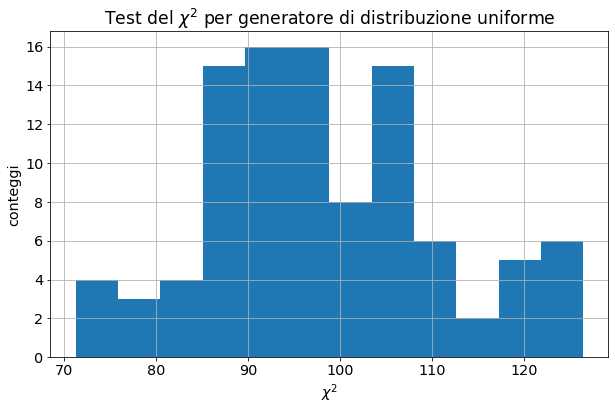

In [40]:
chi = np.loadtxt("Out3.dat", delimiter=' ', unpack='true')
# the histogram of the data
n_bins = 12

n, bins, patches = plt.hist(chi, n_bins)

plt.xlabel(r'$\chi^2$')
plt.ylabel('conteggi')
plt.title(r'Test del $\chi^2$ per generatore di distribuzione uniforme')
plt.grid(True)

plt.show()

## Esercizio 2

### Punto 1

Aggiungere due generatori di numeri pseudo-casuali secondo le distribuzioni 
* esponenziale: $p(x)=\lambda\exp(-\lambda x)$ con $x \in [0,+\infty]$
* Lorentziana: $p(x) = \frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2 + \Gamma^2}$ con $x \in [-\infty, +\infty]$

Per costruire i generatori di nuermi pseud-casuali secondo le due distribuzioni assegnate è stato utilizzato il metodo di inversione della cumulativa.

### Punto 2

Riempire quattro istogrammi, uno per ciascuno dei seguenti valori di $N \in {\{1,2,10,100\}} $ con $M=10^4$ valori per le seguenti distribuzioni:
* distribuzione uniforme su $[0,1]$
* distribuzione Lorentziana $(\mu = 0, \Gamma=1)$
* distribuzione esponenziale $(\lambda =1)$

**Distribuzione uniforme**

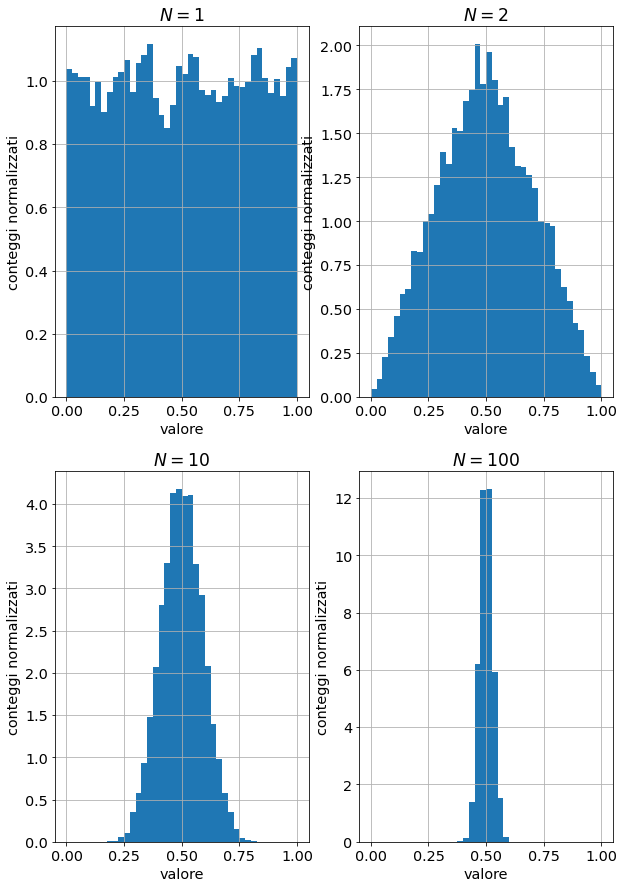

In [6]:
#distribuzione uniforme
n1, n2, n10, n100 = np.loadtxt("./Unif", usecols=(1,2,3,4), delimiter=',', unpack='true')
n_bins = 40

fig, ((histo1,histo2), (histo10,histo100)) = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(10)

histo1.hist(n1, n_bins, density=True, range=(0,1))
histo2.hist(n2, n_bins, density=True, range=(0,1))
histo10.hist(n10, n_bins, density=True, range=(0,1))
histo100.hist(n100, n_bins, density=True, range=(0,1))

histo1.set_xlabel('valore')
histo2.set_xlabel('valore')
histo10.set_xlabel('valore')
histo100.set_xlabel('valore')

histo1.set_ylabel('conteggi normalizzati')
histo2.set_ylabel('conteggi normalizzati')
histo10.set_ylabel('conteggi normalizzati')
histo100.set_ylabel('conteggi normalizzati')

histo1.grid(); histo1.set_title('$N = 1$')
histo2.grid(); histo2.set_title('$N = 2$')
histo10.grid(); histo10.set_title('$N = 10$')
histo100.grid(); histo100.set_title('$N = 100$')

plt.show()

**Distribuzione Lorentziana**

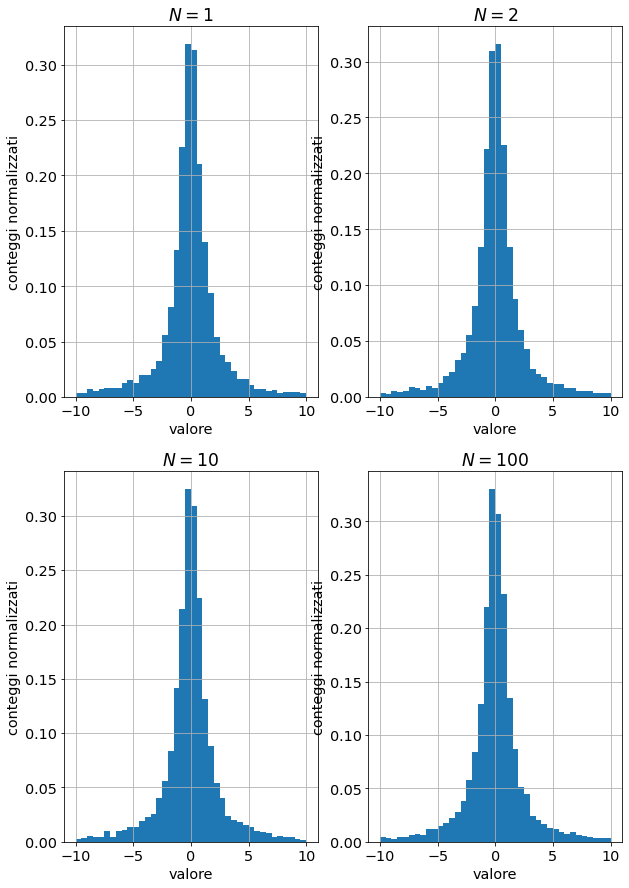

In [8]:
#distribuzione Lorentziana
n1, n2, n10, n100 = np.loadtxt("./Lor", usecols=(1,2,3,4), delimiter=',', unpack='true')
n_bins = 40

fig, ((histo1,histo2), (histo10,histo100)) = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(10)

histo1.hist(n1, n_bins, density=True, range=(-10,10))
histo2.hist(n2, n_bins, density=True, range=(-10,10))
histo10.hist(n10, n_bins, density=True, range=(-10,10))
histo100.hist(n100, n_bins, density=True, range=(-10,10))

histo1.set_xlabel('valore')
histo2.set_xlabel('valore')
histo10.set_xlabel('valore')
histo100.set_xlabel('valore')

histo1.set_ylabel('conteggi normalizzati')
histo2.set_ylabel('conteggi normalizzati')
histo10.set_ylabel('conteggi normalizzati')
histo100.set_ylabel('conteggi normalizzati')

histo1.grid(); histo1.set_title('$N = 1$')
histo2.grid(); histo2.set_title('$N = 2$')
histo10.grid(); histo10.set_title('$N = 10$')
histo100.grid(); histo100.set_title('$N = 100$')

plt.show()

**Distribuzione esponenziale**

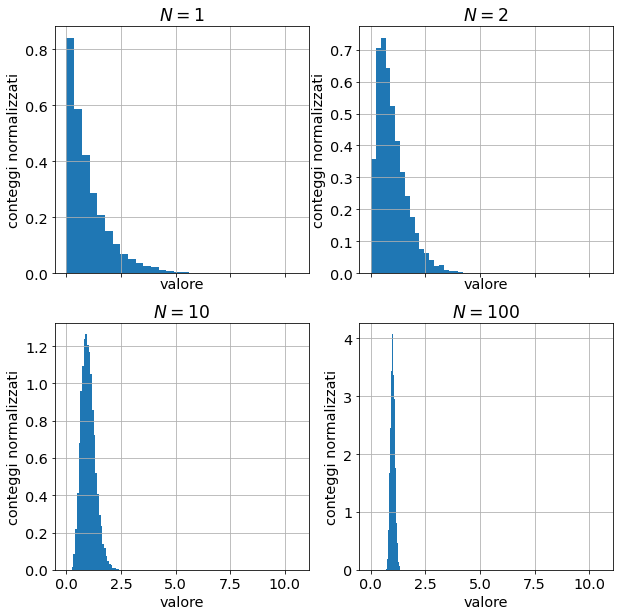

In [43]:
n1, n2, n10, n100 = np.loadtxt("./out4", usecols=(1,2,3,4), delimiter=',', unpack='true')
n_bins = 30

fig, ((histo1,histo2), (histo10,histo100)) = plt.subplots(2,2, sharex = True)
fig.set_figheight(10)
fig.set_figwidth(10)

histo1.hist(n1, n_bins, density=True)
histo2.hist(n2, n_bins, density=True)
histo10.hist(n10, n_bins, density=True)
histo100.hist(n100, n_bins, density=True)

histo1.set_xlabel('valore')
histo2.set_xlabel('valore')
histo10.set_xlabel('valore')
histo100.set_xlabel('valore')

histo1.set_ylabel('conteggi normalizzati')
histo2.set_ylabel('conteggi normalizzati')
histo10.set_ylabel('conteggi normalizzati')
histo100.set_ylabel('conteggi normalizzati')

histo1.grid(); histo1.set_title('$N = 1$')
histo2.grid(); histo2.set_title('$N = 2$')
histo10.grid(); histo10.set_title('$N = 10$')
histo100.grid(); histo100.set_title('$N = 100$')

plt.show()

## Esercizio 3

__Simulazione dell'esperimento di Buffon__ : un ago di lunghezza $L$ viene lanciato sun un piano orizzontale su cui sono presenti delle linee distanti l'una dall'altra $d$ con $d>L$. La probabilità che l'ago intersechi una linea è pari a $P = \frac{2L}{\pi d}$.

SImulando questo esperimento un numero elevato di volte si può avere una stima numerica della probabilità: $P = \lim_{N_{thr}\to\infty \frac{N_{hit}}{N_{thr}}}$; quindi si può ottenere una stima di $\pi$ come segue:
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{dN_{hit}}$$

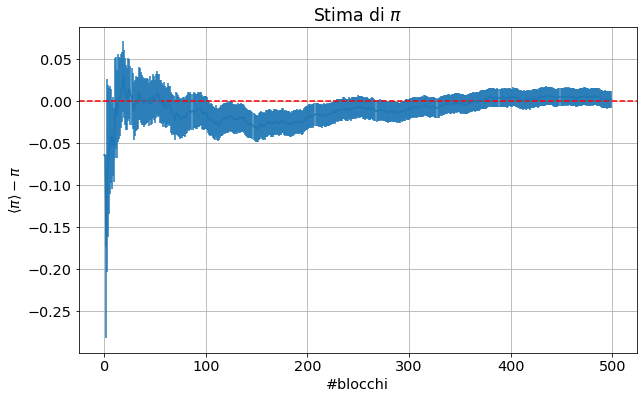

In [9]:
media, sigma_media = np.loadtxt("Pi.dat", usecols=(1,2), delimiter=' ', unpack='true')
valor_vero = np.pi
x = np.arange(len(media))
plt.errorbar(x,media-valor_vero,yerr=sigma_media)
plt.axhline(0.0, color = 'red', linestyle = 'dashed')
plt.title('Stima di $\pi$')
plt.xlabel('#blocchi')
plt.ylabel(r'$\langle \pi \rangle - \pi$')
plt.grid(True)
plt.show()

Per effetturare la simulazione sono stati eseguiti $10^5$ lanci che sono stati suddivisi in $5\times10^2$ blocchi e dei valori di $d=1$ e $L=0.78$.
Il risultato finale è una stima di $\pi = 3.143 \pm 0.010 $ compatibile con il valore vero.